In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('data.csv')
df.head(10)

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1
5,-121.393638,120.037573,1
6,-102.569918,113.840641,1
7,-118.175619,110.460679,1
8,-118.366669,115.000000,1
9,-102.731143,122.923042,1


In [3]:
df.shape

(2227, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [5]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [7]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6dfada4cd0>,
      dtype=object)

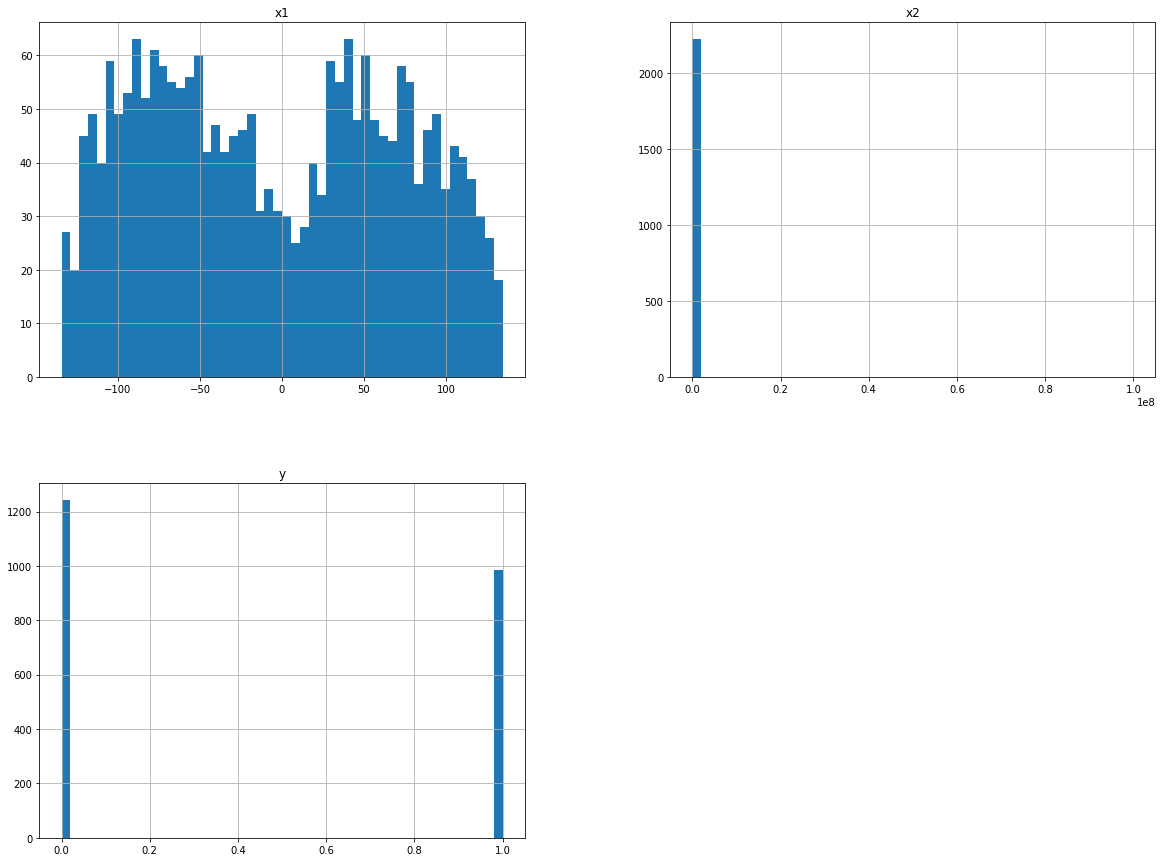

In [6]:
df.hist(bins=50,figsize=(20,15))

**Handling Missing Values**

In [8]:
df.isna().sum()

x1    5
x2    3
y     0
dtype: int64

In [9]:
meanx1=df['x1'].mean()
df['x1'].fillna(meanx1,inplace=True)
meanx2=df['x2'].mean()
df['x2'].fillna(meanx2,inplace=True)

In [10]:
df.isna().sum()


x1    0
x2    0
y     0
dtype: int64

**A.Logistic Regression**

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

**Train/Test Splitting**

In [12]:
def split_train_test(data,test_ratio):
  shuffled=np.random.permutation(len(data))
  test_set_size=int(len(data)*test_ratio)
  test_indices=shuffled[:test_set_size]
  train_indices=shuffled[test_set_size:]
  return data.iloc[train_indices],data.iloc[test_indices]


In [13]:
train_set,test_set=split_train_test(df,0.2)

In [15]:
df=train_set.drop('y',axis=1)
df_labels=train_set['y'].copy()


In [16]:
model=LogisticRegression()
model.fit(df,df_labels)
exam=model.predict([[25.25,-73.62]])
print(exam)

[0]


**SVM with Linear Kernel**

In [ ]:
from sklearn import svm
C = 1.0 
svc = svm.SVC(kernel ='linear', C = 1).fit(df,df_labels)
exam=svc.predict([[25.25,-73.62]])

**Decision Tree**


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
clf = DecisionTreeClassifier()
clf = clf.fit(df,df_labels)
y_pred = clf.predict([[25.25,-73.62]])
print(y_pred)

[1]
